In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

from PIL import Image
import imagesize

from sklearn.preprocessing import LabelEncoder

In [2]:
# train_data = np.array([np.array(Image.open('Train/' + image_jpg)) for image_jpg in training_descriptions['filename']])
# test_data = np.array([np.array(Image.open('Test/' + image_jpg)) for image_jpg in testing_descriptions['filename']])
# train_data, test_data = train_data / 255, test_data / 255

In [98]:
bloodcells = os.listdir("bloodcells_dataset")

print(bloodcells)

bloodcells.remove('.DS_Store')
bloodcells.remove('All_Images')

['basophil', 'neutrophil', '.DS_Store', 'ig', 'monocyte', 'All_Images', 'eosinophil', 'erythroblast', 'lymphocyte', 'platelet']


In [100]:
images = os.listdir('bloodcells_dataset/' + bloodcells[0])
df = pd.DataFrame(data = {'images': images, 'type': bloodcells[0], 'height': np.nan, 'width': np.nan})

for i in range(1, len(bloodcells)):

    images = os.listdir('bloodcells_dataset/' + bloodcells[i]) # jpg string paths
    
    images_df = pd.DataFrame(data = {'images': images, 'type': bloodcells[i], 'height': np.nan, 'width': np.nan})
    
    df = pd.concat([df, images_df])

le = LabelEncoder()

df['width'] = df['images'].apply(lambda x: imagesize.get('bloodcells_dataset/All_Images/' + x)[0])
df['height'] = df['images'].apply(lambda x: imagesize.get('bloodcells_dataset/All_Images/' + x)[1])
df['type'] = le.fit_transform(df['type'])
df.index = range(len(df.index))


df

,images,type,height,width
0,BA_689200.jpg,0,363,360
1,BA_883452.jpg,0,363,360
2,BA_382161.jpg,0,369,366
3,BA_175579.jpg,0,363,360
4,BA_775722.jpg,0,363,360
...,...,...,...,...
17087,PLATELET_495918.jpg,7,363,360
17088,PLATELET_897238.jpg,7,363,360
17089,PLATELET_750430.jpg,7,363,360
17090,PLATELET_810431.jpg,7,363,360


In [101]:
df[['height', 'width']].value_counts().reset_index(name = 'count')

,height,width,count
0,363,360,16639
1,369,366,250
2,360,360,198
3,361,360,2
4,360,359,1
5,360,361,1
6,360,362,1


In [97]:
df[df['width'] == 361]

,images,type,height,width
5763,IG_771333.jpg,3,360,361


The dimensions of the image are: 363 x 360


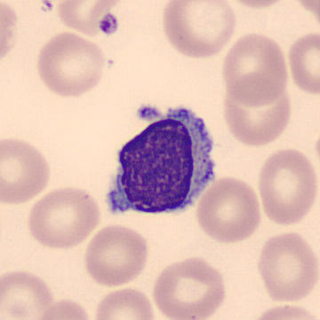

In [88]:
test_img = Image.open('bloodcells_dataset/All_Images/' + df['images'][14000])

width, height = test_img.size

print("The dimensions of the image are:", height, 'x', width)

test_img.resize((320, 320))

(320, 320, 3)


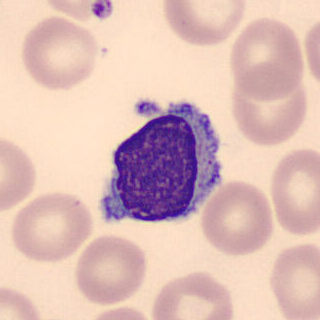

In [86]:
test_img2 = test_img.crop((20, 20, 340, 340))

print(np.array(test_img2).shape)

test_img2

In [52]:
# test1 = df[df['type'] == 'basophil']
# test2 = df[df['type'] == 'platelet']

# test = df[(df['height'] == 363) & (df['width'] == 360)]

# HOW DO WE WANT TO RESIZE?

test = df.head(500) # do in batches of 5000

x = np.array([np.array(Image.open('bloodcells_dataset/All_Images/' + image).resize((300, 300))) for image in test['images']])

x.shape


(500, 300, 300, 3)

In [8]:
# check = np.array(Image.open('bloodcells_dataset/All_Images/' + df[['images'][0]))

# check.shape

df['images']

0              BA_689200.jpg
1              BA_883452.jpg
2              BA_382161.jpg
3              BA_175579.jpg
4              BA_775722.jpg
                ...         
17087    PLATELET_495918.jpg
17088    PLATELET_897238.jpg
17089    PLATELET_750430.jpg
17090    PLATELET_810431.jpg
17091    PLATELET_499850.jpg
Name: images, Length: 17092, dtype: object